# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy positions by setting `fmt` (format string) at `g^`, and your sell positions by setting fmt at `rv`.

### Below are the lines of code that lead to an answer:

In [3]:
# google df
googl = yf.download("GOOGL", start="2011-08-01", end="2020-07-31")

#sma
googl["SMA_42"] =\
(
    googl["Adj Close"]
    .rolling(window = 42)
    .mean()
)

# standard deviation
googl["distance"] = googl["Adj Close"]-googl["SMA_42"]
googl_threshold = np.std(2 * googl["distance"]) + googl["SMA_42"]


[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

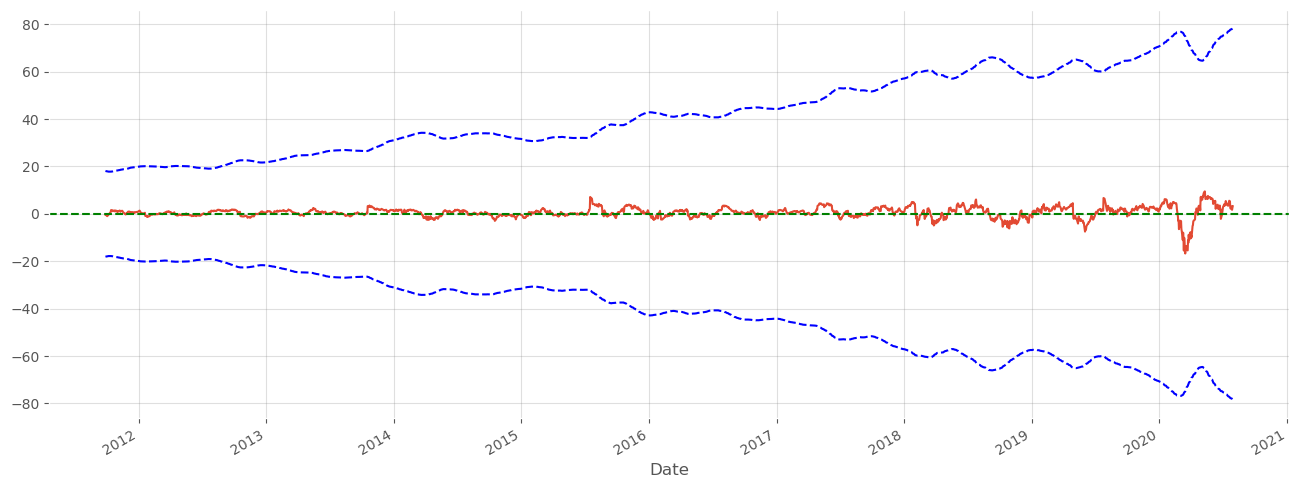

In [4]:
(googl["distance"]
 .dropna()
 .plot(figsize = [16, 6]
      )
)

plt.plot(googl_threshold, color = "blue", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.plot(-googl_threshold, color = "blue", ls = "--")

# Buy Signal
googl["buy_positions"] =\
(
    np
    .where(googl["distance"] < -googl_threshold,
           1, np.nan)
)

(
    googl["buy_positions"]
    .dropna()
    .plot(figsize = [16 , 6],
          style = "g^",
          alpha = 0.30)
)

# Sell Signal
googl["sell_positions"] =\
(
    np
    .where(googl["distance"] > googl_threshold,
           -1, np.nan)
)

(
    googl["sell_positions"]
    .dropna()
    .plot(figsize = [16 , 6],
          style = "rv",
          alpha = 0.30)
)


### <font color = red> Answer 1 is presented in the cell below: </font>

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [5]:
aapl = yf.download("AAPL", start="2011-08-01", end="2020-07-31")
amzn = yf.download("AMZN", start="2011-08-01", end="2020-07-31")

daily_returns_aapl = aapl.pct_change()
daily_returns_amzn = amzn.pct_change()

#mean log returns
log_ret_aapl = np.mean(np.log(1 + daily_returns_aapl['Adj Close'])) * 252
log_ret_amzn = np.mean(np.log(1 + daily_returns_amzn['Adj Close'])) * 252

#standard deviations of the daily returns 
std_dev_aapl = np.std(daily_returns_aapl['Adj Close']) * 252 ** 0.5
std_dev_amzn = np.std(daily_returns_amzn['Adj Close']) * 252 ** 0.5

#sharpe
sharpe_ratio_aapl = log_ret_aapl / std_dev_aapl
sharpe_ratio_amzn = log_ret_amzn / std_dev_amzn

print("Sharpe Ratio for AAPL:", sharpe_ratio_aapl)
print("Sharpe Ratio for AMZN:", sharpe_ratio_amzn)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Sharpe Ratio for AAPL: 0.8174138870245892
Sharpe Ratio for AMZN: 0.9226719991818074


In [6]:
amzn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-08-01,11.250000,11.372500,10.883000,11.066000,11.066000,115786000
2011-08-02,11.016000,11.121500,10.565000,10.585000,10.585000,131734000
2011-08-03,10.648500,10.741500,10.277000,10.498000,10.498000,163942000
2011-08-04,10.336500,10.400000,10.072500,10.074000,10.074000,131590000
2011-08-05,10.233500,10.366000,9.742000,10.135000,10.135000,200480000
...,...,...,...,...,...,...
2020-07-24,146.500000,151.578995,144.399994,150.445496,150.445496,112648000
2020-07-27,153.100006,154.899994,150.788498,152.760498,152.760498,83410000
2020-07-28,152.713501,153.854507,149.787994,150.016495,150.016495,62534000


### <font color = red> Answer 2 </font>

    The answer is _______AMZN_____ .

### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [7]:
Capital = 2e5

#aapl sma
aapl["SMA_42"] =\
(
    aapl["Adj Close"]
    .rolling(window = 42)
    .mean()
)

#aapl standard deviation
aapl["distance"] = aapl["Adj Close"]-aapl["SMA_42"]
aapl_threshold = np.std(2 * aapl["distance"])

# amzn sma
amzn["SMA_42"] =\
(
    amzn["Adj Close"]
    .rolling(window = 42)
    .mean()
)

#amzn standard deviation
amzn["distance"] = amzn["Adj Close"]-amzn["SMA_42"]
amzn_threshold = np.std(2 * amzn["distance"])


col         = 'distance'

#conditions
googl_conditions  = [ googl[col] >= googl_threshold, googl[col] * googl[col].shift(1) < 0, googl[col] <= -googl_threshold ]
aapl_conditions  = [ aapl[col] >= aapl_threshold, aapl[col] * aapl[col].shift(1) < 0, aapl[col] <= -aapl_threshold ]
amzn_conditions  = [ amzn[col] >= amzn_threshold, amzn[col] * amzn[col].shift(1) < 0, amzn[col] <= -amzn_threshold ]

choices     = [ -1, 0, 1 ]

#positions
googl['trading_positions'] = np.select(googl_conditions, choices, np.nan)
aapl['trading_positions'] = np.select(aapl_conditions, choices, np.nan)
amzn['trading_positions'] = np.select(amzn_conditions, choices, np.nan)

googl["trading_positions"] =\
    (googl["trading_positions"]
     .ffill()
    )

aapl["trading_positions"] =\
    (aapl["trading_positions"]
     .ffill()
    )

amzn["trading_positions"] =\
    (amzn["trading_positions"]
     .ffill()
    )

#diff
googl["Positions"] =\
(    googl["trading_positions"]
     .diff()
)

aapl["Positions"] =\
(    aapl["trading_positions"]
     .diff()
)

amzn["Positions"] =\
(    amzn["trading_positions"]
     .diff()
)

#position
Position =\
    (
    pd
    .DataFrame(index = googl.index)
    .fillna(0.0)
    )

Position["googl"] =\
    (2000 * googl["Positions"]
    )

Position["aapl"] =\
    (2000 * aapl["Positions"]
    )

Position["amzn"] =\
    (2000 * amzn["Positions"]
    )

#store market value

Portfolio =\
    (
    pd
    .DataFrame(index = googl.index)
    .fillna(0.0)
    )


Portfolio["googl"] =\
(    Position["googl"]
    .multiply(googl["Adj Close"],
              axis = 0)
)

Portfolio["aapl"] =\
(    Position["aapl"]
    .multiply(aapl["Adj Close"],
              axis = 0)
)

Portfolio["amzn"] =\
(    Position["amzn"]
    .multiply(amzn["Adj Close"],
              axis = 0)
)

difference_googl =\
(
    Position["googl"]
    .diff()
)

difference_aapl =\
(
    Position["aapl"]
    .diff()
)

difference_amzn =\
(
    Position["amzn"]
    .diff()
)

#cash
Portfolio["our_cash_googl"] =\
(    Capital - (difference_googl
               .multiply(googl["Adj Close"], axis = 0)
               ).cumsum()
)

Portfolio["our_cash_aapl"] =\
(    Capital - (difference_googl
               .multiply(aapl["Adj Close"], axis = 0)
               ).cumsum()
)

Portfolio["our_cash_amzn"] =\
(    Capital - (difference_googl
               .multiply(amzn["Adj Close"], axis = 0)
               ).cumsum()
)

#total
Portfolio["total_googl"] =\
    Portfolio["our_cash_googl"] + Portfolio["googl"]

Portfolio["total_aapl"] =\
    Portfolio["our_cash_aapl"] + Portfolio["aapl"]

Portfolio["total_amzn"] =\
    Portfolio["our_cash_amzn"] + Portfolio["amzn"]




In [8]:
Portfolio

,googl,aapl,amzn,our_cash_googl,our_cash_aapl,our_cash_amzn,total_googl,total_aapl,total_amzn
Date,,,,,,,,,
2011-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-07-24,0.0,0.0,0.0,200000.0,200000.0,200000.0,200000.0,200000.0,200000.0
2020-07-27,0.0,0.0,0.0,200000.0,200000.0,200000.0,200000.0,200000.0,200000.0
2020-07-28,0.0,0.0,0.0,200000.0,200000.0,200000.0,200000.0,200000.0,200000.0


### <font color = red> Answer 3 </font>

    GOOGL : ______212098______ 
    
    AAPL  : _____212184_______ 
     
    AMZN  : _____185792_______ 
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

In [9]:
CAGR_googl = ((googl["Adj Close"][2264] / googl['Adj Close'][0])**(365/2265))-1
CAGR_aapl = ((aapl["Adj Close"][2264] / aapl['Adj Close'][1])**(365/2265))-1
CAGR_amzn = ((amzn["Adj Close"][2264] / amzn['Adj Close'][1])**(365/2265))-1

print("CAGR for googl:", CAGR_googl)
print("CAGR for aapl:", CAGR_aapl)
print("CAGR for amzn:", CAGR_amzn)

CAGR for googl: 0.29882309934686324
CAGR for aapl: 0.3980680708784168
CAGR for amzn: 0.5372542259804387


### <font color = red> Answer 4 </font>

    GOOGL : ____0.30________ 
    
    AAPL  : _____0.40_______ 
     
    AMZN  : _________0.54___ 

## 👇 Questions 5 and 7 ask you to predict future market direction. Let's analyze `GE`.

###  <font color = blue> 👉 Question 5. </font> First, predict tomorrow's log returns using today's returns, yesterday's returns, and the day before yesterday's returns — a total of three lags. 

### Next, predict tomorrow's log returns using a lag of 10 days. 

### Finally, predict tomorrow's log returns using a lag of 22 days. 

### You can achieve this using the least squares function in the numpy library's linear algebra module. 

### Then, plot the gross performance of the base instrument and the three strategies that can be constructed based on these three lagged variables over time. 

### This analysis is conducted in-sample and does not consider transaction costs. </font>

### Below are the lines of code that lead to an answer:

In [10]:
GE = yf.download("GE", start="2011-08-01", end="2020-07-31")

[*********************100%%**********************]  1 of 1 completed


In [11]:
GE["RETURN"]  =\
    np \
    .log(GE["Adj Close"]
          /
         GE["Adj Close"].shift(1)
         )
GE["Lag_1"] = GE["RETURN"].shift(1)
GE["Lag_3"] = GE["RETURN"].shift(3)
GE["Lag_10"] = GE["RETURN"].shift(10)
GE["Lag_22"] = GE["RETURN"].shift(22)

GE = GE.dropna()

In [12]:
lag = pd.concat([GE["Lag_10"],GE["Lag_22"]],axis = 1)

OLS =\
    np \
    .linalg \
    .lstsq(lag,
           GE["RETURN"],
           rcond = None)[0]

print(OLS)

GE["PREDICTION"] =\
    np \
    .dot(lag,
         OLS)

GE


[ 0.019 -0.017]


C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\3797756118.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GE["PREDICTION"] =\


,Open,High,Low,Close,Adj Close,Volume,RETURN,Lag_1,Lag_3,Lag_10,Lag_22,PREDICTION
Date,,,,,,,,,,,,
2011-09-01,97.940308,98.780998,96.979523,97.279770,74.462166,10194417,-0.006767,0.011718,0.031669,-0.056398,-0.043213,-0.000340
2011-09-02,95.178047,95.598389,93.376572,94.637604,72.439735,10282212,-0.027536,-0.006767,0.004975,-0.016431,0.014995,-0.000576
2011-09-06,91.575089,91.815292,90.073860,91.575089,70.095543,16231113,-0.032896,-0.027536,0.011718,0.001324,-0.058944,0.001044
2011-09-07,93.076324,95.178047,92.716026,94.877800,72.623611,10031667,0.035431,-0.032896,-0.006767,0.028061,0.002426,0.000499
2011-09-08,94.217255,95.057945,93.016273,93.616768,71.658340,19637351,-0.013381,0.035431,-0.027536,0.011517,-0.067653,0.001391
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-24,43.840748,44.402809,42.591724,42.841530,42.313423,10480101,-0.025901,-0.002837,0.024444,0.016579,-0.005698,0.000418
2020-07-27,42.716629,42.779079,41.779858,41.904762,41.388203,11321478,-0.022108,-0.025901,0.002837,0.001494,-0.069503,0.001230
2020-07-28,41.842312,43.466042,41.779858,43.028885,42.498466,12174880,0.026472,-0.022108,-0.002837,0.026511,0.022711,0.000119


### <font color = red> Answer 5 </font>

    The answer is shown in the below plot.

<Axes: xlabel='Date'>

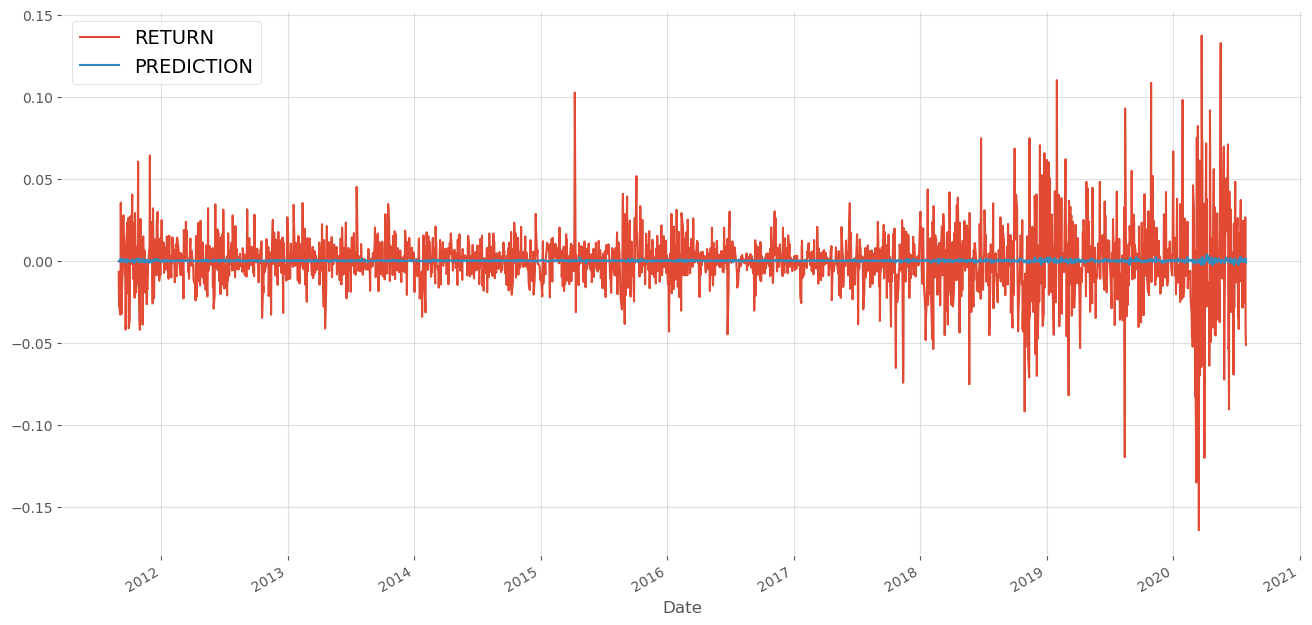

In [13]:
GE \
    [["RETURN", "PREDICTION"]] \
    .plot(figsize = (16, 8)
         )

###  <font color = blue> 👉 Question 6. </font> Now, let's define performance metrics for accuracy.

### In our class, we calculated accuracy with the operational knowledge that, while it's theoretically possible for both returns and predictions to be positive, negative, or zero, only returns contained zero values. Predictions, on the other hand, did not include zeros; as a result, we considered them invalid predictions rather than irrelevant.

### Below, you will find two prototype functions (namely, `calculate_accuracy_A` and `calculate_accuracy_B`) that you can adapt for accuracy calculations. Please evaluate both functions and decide which one you prefer to use as a prototype for your work. Subsequently, explain why you favor the specific function for assessing accuracy.

### Then, using the chosen prototype of function, revise it and execute to assess the accuracy of the predictions obtained from the above lags approaches.

In [30]:
def calculate_accuracy_A(returns, predictions):
    
    tolerance = 0.01
    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions
    invalid_predictions = total_predictions - valid_predictions
    return  valid_predictions,invalid_predictions,accuracy_A

In [15]:
def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return total_correct,total_incorrect,accuracy_B

### Below are the lines of code that lead to an answer:

In [16]:
lag3 = pd.concat([GE["Lag_1"],GE["Lag_3"]],axis = 1)

OLS3 =\
    np \
    .linalg \
    .lstsq(lag3,
           GE["RETURN"],
           rcond = None)[0]

GE["PREDICTION3"] =\
    np \
    .dot(lag,
         OLS3)

lag10 = pd.concat([GE["Lag_1"],GE["Lag_10"]],axis = 1)

OLS10 =\
    np \
    .linalg \
    .lstsq(lag10,
           GE["RETURN"],
           rcond = None)[0]

GE["PREDICTION10"] =\
    np \
    .dot(lag,
         OLS10)

lag22 = pd.concat([GE["Lag_1"],GE["Lag_22"]],axis = 1)

OLS22 =\
    np \
    .linalg \
    .lstsq(lag22,
           GE["RETURN"],
           rcond = None)[0]

GE["PREDICTION22"] =\
    np \
    .dot(lag,
         OLS22)


C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\1854477090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GE["PREDICTION3"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\1854477090.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GE["PREDICTION10"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\1854477090.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [31]:
print(calculate_accuracy_A(GE["RETURN"], GE["PREDICTION3"]))
print(calculate_accuracy_A(GE["RETURN"], GE["PREDICTION10"]))
print(calculate_accuracy_A(GE["RETURN"], GE["PREDICTION22"]))

(1321, 921, 0.5892060660124888)
(1319, 923, 0.588314005352364)
(1322, 920, 0.5896520963425513)


In [18]:
print(calculate_accuracy_B(GE["RETURN"], GE["PREDICTION3"]))
print(calculate_accuracy_B(GE["RETURN"], GE["PREDICTION10"]))
print(calculate_accuracy_B(GE["RETURN"], GE["PREDICTION22"]))

(1086, 1156, 0.48438893844781444)
(1085, 1157, 0.483942908117752)
(1095, 1147, 0.48840321141837645)


### <font color = red> Answer 6 </font>
    The prediction is __1086___ times correct and ___1156__ wrong. The accuracy is ___0.48438893844781444___ % with a 3-day lag.
    
    The prediction is __1085___ times correct and __1157___ wrong. The accuracy is ___0.483942908117752___ % with a 10-day lag.
    
    The prediction is __1095___ times correct and ___1147__ wrong. The accuracy is __0.4884032114183764____ % with a 22-day lag.
    

###  <font color = blue> 👉 Question 7. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [19]:
log_ret_3 = np.mean(np.log(1 + GE['PREDICTION3'])) * 252
log_ret_10 = np.mean(np.log(1 + GE['PREDICTION10'])) * 252
log_ret_22 = np.mean(np.log(1 + GE['PREDICTION22'])) * 252

std_dev_3 = np.std(GE['PREDICTION3']) * 252 ** 0.5
std_dev_10 = np.std(GE['PREDICTION10']) * 252 ** 0.5
std_dev_22 = np.std(GE['PREDICTION22']) * 252 ** 0.5

sharpe_ratio_3 = log_ret_3 / std_dev_3
sharpe_ratio_10 = log_ret_10 / std_dev_10
sharpe_ratio_22 = log_ret_22 / std_dev_22

print("Sharpe Ratio for Alpha 3:", sharpe_ratio_3)
print("Sharpe Ratio for Alpha 10:", sharpe_ratio_10)
print("Sharpe Ratio for Alpha 22:", sharpe_ratio_22)


Sharpe Ratio for Alpha 3: 0.013205730177195204
Sharpe Ratio for Alpha 10: 0.05041032543297192
Sharpe Ratio for Alpha 22: 0.26005183232883294


### <font color = red> Answer 7 </font>

    The strategy for GE with a 3-day lag leads to a Sharpe ratio of ____0.013208676707454388______ .
    
    The strategy for GE with a 10-day lag leads to a Sharpe ratio of _____0.05041193838617989_____ .
        
    The strategy for GE with a 22-day lag leads to a Sharpe ratio of ____0.26005205065677334______ .

## 👇 Questions 8 to 10 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 8. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [20]:
GS = yf.download("GS", start="2013-11-01", end="2021-10-31")
JPM = yf.download("JPM", start="2013-11-01", end="2021-10-31")

GS["SMA_24"] =\
(
    GS
    ["Adj Close"]
    .rolling(window = 24)
    .mean()
)

GS["SMA_58"] =\
(
    GS
    ["Adj Close"]
    .rolling(58)
    .mean()
)

GS["positions"] =\
(
    np
    .where(GS["SMA_24"] > GS["SMA_58"],
           1, -1)
)

GS =\
(
    GS
    .dropna()
)

GS["log_returns"] =\
(
    np
    .log(GS["Adj Close"] / GS["Adj Close"].shift(1)
        )
)

GS["strategy_returns"] =\
(
    GS["positions"]
    .shift(1) 
    * 
    GS["log_returns"]
)


#JPM

JPM["SMA_24"] =\
(
    JPM
    ["Adj Close"]
    .rolling(window = 24)
    .mean()
)

JPM["SMA_58"] =\
(
    JPM
    ["Adj Close"]
    .rolling(58)
    .mean()
)

JPM["positions"] =\
(
    np
    .where(JPM["SMA_24"] > JPM["SMA_58"],
           1, -1)
)

JPM =\
(
    JPM
    .dropna()
)

JPM["log_returns"] =\
(
    np
    .log(JPM["Adj Close"] / JPM["Adj Close"].shift(1)
        )
)

JPM["strategy_returns"] =\
(
    JPM["positions"]
    .shift(1) 
    * 
    JPM["log_returns"]
)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\61741160.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JPM["log_returns"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\61741160.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JPM["strategy_returns"] =\


### <font color = red> Answer 8 (`visualization component`) is presented in the cell below: </font>

<Axes: xlabel='Date'>

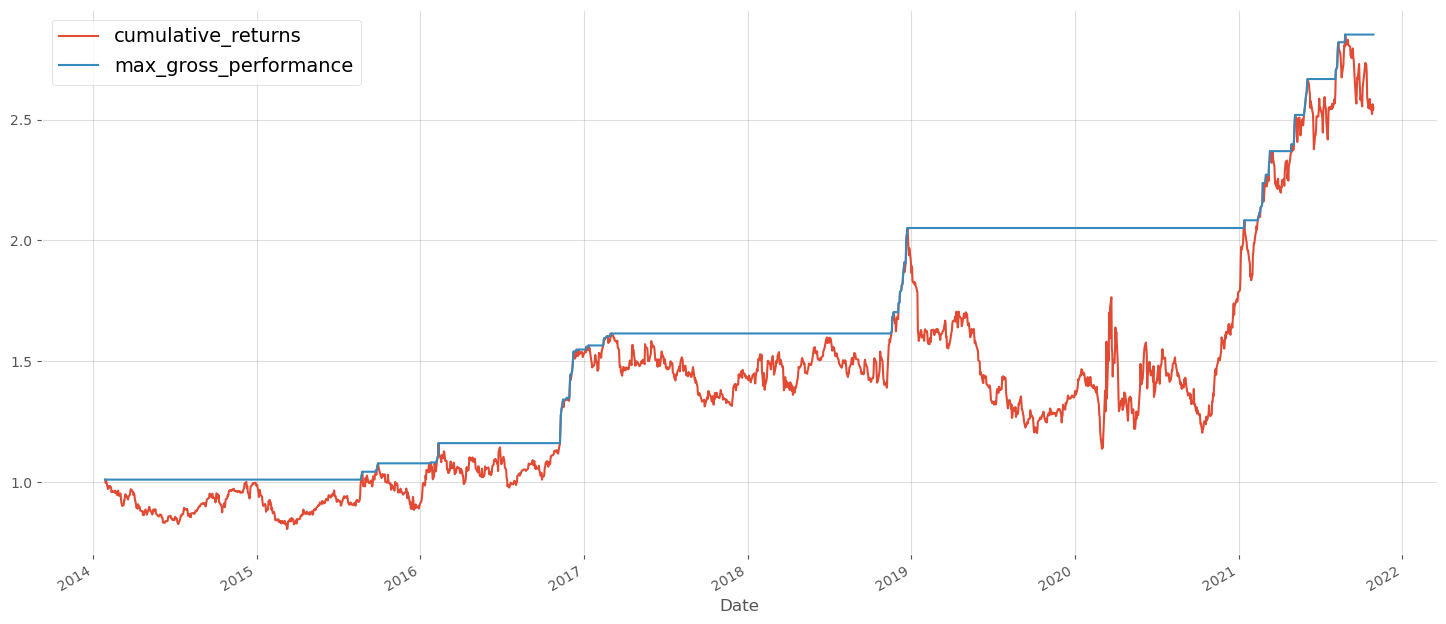

In [21]:
GS["cumulative_returns"] =\
(
    GS["strategy_returns"]
    .cumsum()
    .apply(np.exp)
)

GS["max_gross_performance"] =\
(
    GS
    ["cumulative_returns"]
    .cummax()
)

(
    GS
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)


C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\2331771743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JPM["cumulative_returns"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\2331771743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JPM["max_gross_performance"] =\


<Axes: xlabel='Date'>

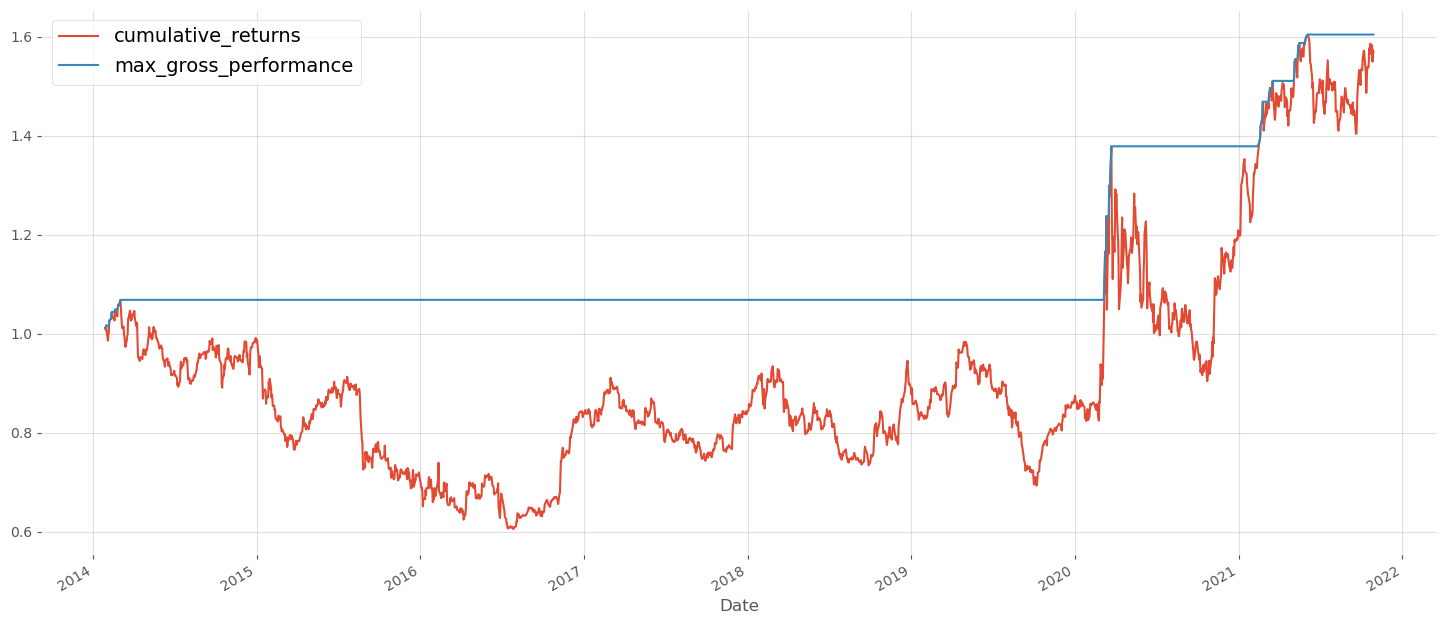

In [22]:
JPM["cumulative_returns"] =\
(
    JPM["strategy_returns"]
    .cumsum()
    .apply(np.exp)
)

JPM["max_gross_performance"] =\
(
    JPM
    ["cumulative_returns"]
    .cummax()
)

(
    JPM
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)


In [23]:
GS_drawdown = GS["max_gross_performance"] - GS["cumulative_returns"]

GS_periods =\
(
    GS_drawdown[GS_drawdown == 0].index[ 1 :   ].to_pydatetime()
    -
    GS_drawdown[GS_drawdown == 0].index[   : -1].to_pydatetime()
)

JPM_drawdown = JPM["max_gross_performance"] - JPM["cumulative_returns"]

JPM_periods =\
(
    JPM_drawdown[JPM_drawdown == 0].index[ 1 :   ].to_pydatetime()
    -
    JPM_drawdown[JPM_drawdown == 0].index[   : -1].to_pydatetime()
)

print(GS_drawdown.max())
print(GS_periods.max())
print(JPM_drawdown.max())
print(JPM_periods.max())

0.914560368289866
752 days, 0:00:00
0.4743981319893801
2198 days, 0:00:00


In [35]:
GS_drawdown = GS["cumulative_returns"]/GS["max_gross_performance"]
GS_drawdown.min()

0.5542491064551939

### <font color = red> Answer 8 </font>
    
    As to GS,
    
    The maximum drawdown is about _____91.8_______ percentage points.
    The longest drawdown period lasts for _______752______ days.
    
    As to JPM,
    
    The maximum drawdown is about _____47.4_______ percentage points.
    The longest drawdown period lasts for ________2198_____ days.
    

###  <font color = blue> 👉 Question 9. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [24]:
def money_after_trading_SMA(stock): 
    Capital = 3e5
    #SMA
    stock["shorter_SMA"] =\
    (
        stock["Adj Close"]
        .rolling(window = 24)
        .mean()
    )

    stock["longer_SMA"] =\
    (
        stock["Adj Close"]
        .rolling(window = 58)
        .mean()
    )


    #signal
    stock["BUY_or_SELL"] =\
    (
        np
        .where(stock["shorter_SMA"] > stock["longer_SMA"],
               1.0,
               0.0
              )
    )

    #diff in signals
    stock["Positions"] =\
    (    stock["BUY_or_SELL"]
         .diff()
    )

    #position
    stock["Position_mult"] =\
        (200 * stock["BUY_or_SELL"]
        )

    #store market value
    stock["MV"]=\
    (    stock["Positions"]
        .multiply(stock["Adj Close"],
                  axis = 0)
    )

    #differences in shares owned
    stock["differences"]=\
    (
        stock["Position_mult"]
        .diff()
    )

    #cash
    stock["our_cash_stock"] =\
    (    Capital - (stock["differences"]
                   .multiply(stock["Adj Close"], axis = 0)
                   ).cumsum()
    )


    #total
    stock["total_stock"] =\
        stock["our_cash_stock"] +  stock["MV"]

    return stock["total_stock"] 


In [25]:
money_after_trading_SMA(GS) 

Date
2014-01-27             NaN
2014-01-28    300000.00000
2014-01-29    300000.00000
2014-01-30    300000.00000
2014-01-31    300000.00000
                  ...     
2021-10-25    349559.14917
2021-10-26    349559.14917
2021-10-27    349559.14917
2021-10-28    349559.14917
2021-10-29    349559.14917
Name: total_stock, Length: 1956, dtype: float64

In [26]:
money_after_trading_SMA(JPM)

C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\414016062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock["shorter_SMA"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\414016062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock["longer_SMA"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\414016062.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

Date
2014-01-27             NaN
2014-01-28    300000.00000
2014-01-29    300000.00000
2014-01-30    300000.00000
2014-01-31    300000.00000
                  ...     
2021-10-25    287174.41864
2021-10-26    287174.41864
2021-10-27    287174.41864
2021-10-28    287174.41864
2021-10-29    287174.41864
Name: total_stock, Length: 1956, dtype: float64

### <font color = red> Answer 9 </font>

    The answer is ___________depends how many shares you buy_________________ .

###  <font color = blue> 👉 Question 10. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [27]:
def trading_opportunities_SMA(stock): 
    #SMA
    stock["shorter_SMA"] =\
    (
        stock["Adj Close"]
        .rolling(window = 24)
        .mean()
    )

    stock["longer_SMA"] =\
    (
        stock["Adj Close"]
        .rolling(window = 58)
        .mean()
    )


    #signal
    stock["BUY_or_SELL"] =\
    (
        np
        .where(stock["shorter_SMA"] > stock["longer_SMA"],
               1.0,
               0.0
              )
    )

    #diff in signals
    stock["Positions"] =\
    (    stock["BUY_or_SELL"]
         .diff()
    )
    
    return stock["Positions"].value_counts()

In [28]:
 trading_opportunities_SMA(GS)

Positions
 0.0    1921
 1.0      17
-1.0      17
Name: count, dtype: int64

In [29]:
 trading_opportunities_SMA(JPM)

C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\29214135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock["shorter_SMA"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\29214135.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock["longer_SMA"] =\
C:\Users\bryan\AppData\Local\Temp\ipykernel_6300\29214135.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Positions
 0.0    1912
 1.0      22
-1.0      21
Name: count, dtype: int64

### <font color = red> Answer 10 </font>

    The answer is _____GS:34________JPM:43_______________ .

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊